## Observations and Insights 

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import scipy.stats as linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
#merge_df.count()  #to check count of items in each row, appears no missing data.
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [60]:
# Checking the number of mice in the DataFrame.
#num_mice = merge_df['Mouse ID'].value_counts()
num_mice = len(merged_df['Mouse ID'].unique())
num_mice



249

In [61]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. Get all the data for the duplicate mouse ID. 

#here we see that there are more than one mouse with the same ID that also have a timepoint of 0, which means there must have been two mice with the same ID
#since there are 249 mice and we show 250 mice with a 0 value, then there must be two separate mouse that used the same ID
merged_df['Timepoint'].value_counts()

#with this line, we are looking at any lines that have the same mouse ID and timepoints. this helps us ID the mouse(mice) that may have used the same ID numbers
#adding the argument keep = false returns all of the duplicated rows. As we can see, it is Mouse ID g989 that is being duplicated.
dupes_df = merged_df[merged_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
dupes_df





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_df = merged_df.drop_duplicates(subset =['Mouse ID' , 'Timepoint'])
#clean_df

#------------dropping all g989---------------#

clean_df = merged_df[merged_df['Mouse ID'] != 'g989']
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [63]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_df['Mouse ID'].unique())
num_mice





248

In [64]:
#checking the number of mice with timpoints of 0 (to verify only 249 mice have timepoints of 0)
clean_df['Timepoint'].value_counts()



0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

## Summary Statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#method1: is the most straightforward, creating multiple series and putting them all together at the end.
#method2: This method produces everything in a single groupby function.

#used method 2 where all stats are produced in a single groupby function
grouped_by_regimen_df = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median','var','std','sem'])
grouped_by_regimen_df



#---------------Method 1----------------------
#group by regimen and then do the summary stats
#grouped_by_regimen_df = clean_df.groupby(['Drug Regimen'])

#tumor_mean = grouped_by_regimen_df['Tumor Volume (mm3)'].mean()
#tumor_median = grouped_by_regimen_df['Tumor Volume (mm3)'].median()
#tumor_variance = grouped_by_regimen_df['Tumor Volume (mm3)'].var()
#tumor_std = grouped_by_regimen_df['Tumor Volume (mm3)'].std()
#tumor_SEM = grouped_by_regimen_df['Tumor Volume (mm3)'].sem()

#create a new dataframe with the tumor's summary statistics
#tumor_summary_df = pd.DataFrame({"Tumor Volume Mean": tumor_mean, "Tumor Volume Median": tumor_median, 
                                 #"Tumor Volume Variance": tumor_variance, "Tumor Volume Std Dev": tumor_std, 
                                 #"Tumor Volume SEM": tumor_SEM})
#tumor_summary_df



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

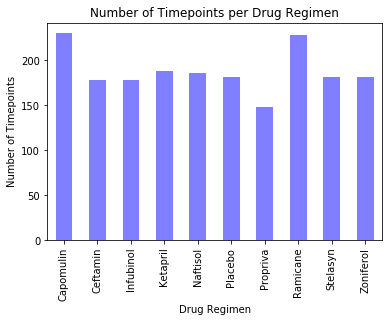

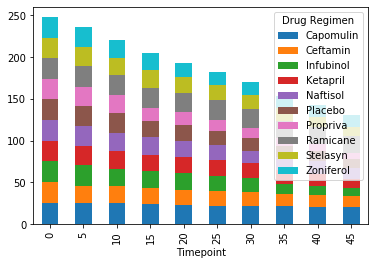

In [66]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

#create a group based on values in drug regimen
grouped_by_regimen = clean_df.groupby(['Drug Regimen'])
#count how many mice are in each regimen group
mouse_count_by_regimen = grouped_by_regimen['Mouse ID'].count()

#create a bar chart based off of the group series from above
mouse_count_chart = mouse_count_by_regimen.plot(kind = 'bar', color='b', alpha = .5)

#set x and y labels
mouse_count_chart.set_title("Number of Timepoints per Drug Regimen")
mouse_count_chart.set_xlabel("Drug Regimen")
mouse_count_chart.set_ylabel("Number of Timepoints")

#mouse_count_by_regimen

#created a stacked bar for extra information
test = clean_df.groupby(['Timepoint', 'Drug Regimen'])['Mouse ID'].count().unstack('Drug Regimen').fillna(0)
test.plot(kind='bar', stacked=True)

#the sum of mice per point



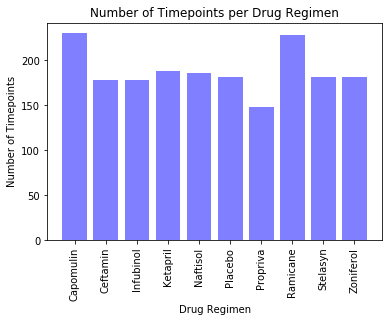

In [67]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

#set label locations
x_axis = np.arange(0,len(grouped_by_regimen['Drug Regimen']))
#x_axis = np.arange(0,len(clean_df['Drug Regimen'].unique()))

x_values = clean_df['Drug Regimen'].unique()
sort_x_values = x_values.sort()

#x_values = grouped_by_regimen['Drug Regimen'].unique()

tick_locations = []

for x in x_values:
    tick_locations.append(x)
    
plt.bar(count_regimen, mouse_count_by_regimen, facecolor="blue", alpha = .5, align = "center")

plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")


plt.xticks(x_axis,tick_locations, rotation = 90)

plt.show()



## Pie Plots

Male      125
Female    123
Name: Sex, dtype: int64

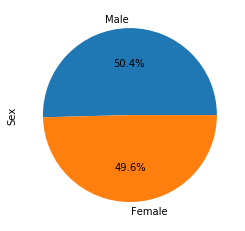

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#drop any duplicate mouse IDs so we can get a unique count of mice by gender
non_dup_df = clean_df.drop_duplicates('Mouse ID')

#count number of mice by sex
mouse_count_by_sex = non_dup_df['Sex'].value_counts()

#create a bar chart based off of the group series from above
mouse_count_pie = mouse_count_by_sex.plot(kind = 'pie', autopct="%1.1f%%")

mouse_count_by_sex

Text(0, 0.5, 'Sex')

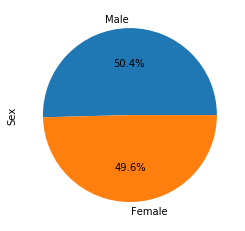

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#create a bar chart based off of the group series from above

labels = ["Male", "Female"]
plt.pie(mouse_count_by_sex, autopct="%1.1f%%", labels=labels)

plt.ylabel("Sex")

#mouse_count_pie = mouse_count_by_sex.plot(kind = 'pie')
#mouse_count_by_sex
#plt.pie()


## Quartiles, Outliers and Boxplots

In [70]:
#creating a function to summarize IQRs and outliers for each regimen

def summary(drug):
    
    df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == drug)]
    tumor_size = df['Tumor Volume (mm3)']
    quartiles = tumor_size.quantile([.25,.5,.75])

    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"\n{drug} summary:------------------")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")



In [71]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Treatments: Capomulin, Ramicane, Infubinol, and Ceftamin.


#=======Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.======# 

#drop all duplicates of Mouse ID but keep the last row for each (which tells us last tumor size)
last_treatment_df = clean_df.drop_duplicates(['Mouse ID'], keep='last')

#keep only necessary columns and filter by the four treatments Capomulin, Ramicane, Infubinol, and Ceftamin.
regimen_df = last_treatment_df.loc[(last_treatment_df['Drug Regimen'] == "Ramicane") | (last_treatment_df['Drug Regimen'] == "Capomulin") | (last_treatment_df['Drug Regimen'] == "Infubinol")| (last_treatment_df['Drug Regimen'] == "Ceftamin")]

#making sure our data is sorted to determine outliers
sorted_regimen_df = regimen_df.sort_values(by=['Tumor Volume (mm3)'])

#=======Calculate the IQR and quantitatively determine if there are any potential outliers for each regimen======#

#created a list of regimens to use for our for loop and function
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

for x in regimens:
    summary(x)




Capomulin summary:------------------
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane summary:------------------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol summary:------------------
The lower quartile of tumor volume is: 54.04860769
The upper quartile of tumor volume is: 65.52574285
The interquartile range of tumor volume is: 11.477135160000003
The the median of tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Value

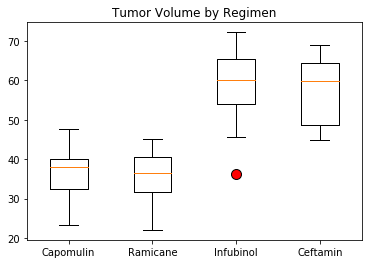

In [72]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#capture tumor size per regimen
cap_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Capomulin")]
cap_tumor_size = cap_df['Tumor Volume (mm3)']

ram_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Ramicane")]
ram_tumor_size = ram_df['Tumor Volume (mm3)']

inf_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Infubinol")]
inf_tumor_size = inf_df['Tumor Volume (mm3)']

cef_df = sorted_regimen_df.loc[(sorted_regimen_df['Drug Regimen'] == "Ceftamin")]
cef_tumor_size = cef_df['Tumor Volume (mm3)']

#create dictionary to store regimen and their volume size data
regimen_dict = ({"Capomulin":cap_tumor_size, "Ramicane": ram_tumor_size, "Infubinol": inf_tumor_size, "Ceftamin": cef_tumor_size})

#set color and shape for outliers
red_diamond = dict(markerfacecolor = 'red', markersize = '10', marker='o')

#plot tumor volume for each Regimen
fig, ax1 = plt.subplots()
ax1.boxplot(regimen_dict.values(), flierprops = red_diamond)

#set title and tick labels
ax1.set_xticklabels(regimen_dict.keys())
ax1.set_title("Tumor Volume by Regimen")

plt.show()

## Line and Scatter Plots

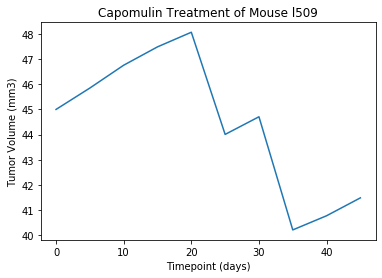

In [73]:
# Generate a line plot of time point versus tumor volume for a single mouse treated with Capomulin

#find mice treated with Capomulin
#cap_mice = clean_df.loc[(clean_df['Drug Regimen'] == "Capomulin")]
#cap_mice

#will be using mouse l509
mouse_df = clean_df.loc[(clean_df['Mouse ID'] == "l509")]

#assign x and y axis
x_axis = mouse_df['Timepoint']
y_axis = mouse_df['Tumor Volume (mm3)']

#plot as line graph, add title and axis titles
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis,y_axis)

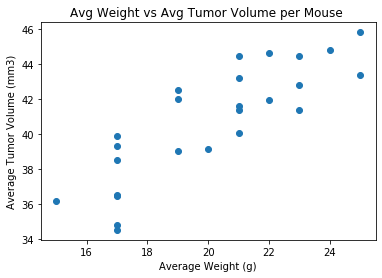

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#filtered data for just Capomulin
cap_df = clean_df.loc[(clean_df['Drug Regimen']=="Capomulin")]
cap_df

#grouped by Mouse ID and calculated average weight and tumor size per Mouse
grouped_cap = cap_df.groupby(['Mouse ID'])
avg_weight = grouped_cap['Weight (g)'].mean()
avg_tumor_size = grouped_cap['Tumor Volume (mm3)'].mean()

plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg Weight vs Avg Tumor Volume per Mouse ")
plt.scatter(avg_weight, avg_tumor_size)



## Correlation and Regression

The correlation between both factors is 0.84


Text(0.5, 1.0, 'Avg Weight vs Avg Tumor Volume per Mouse ')

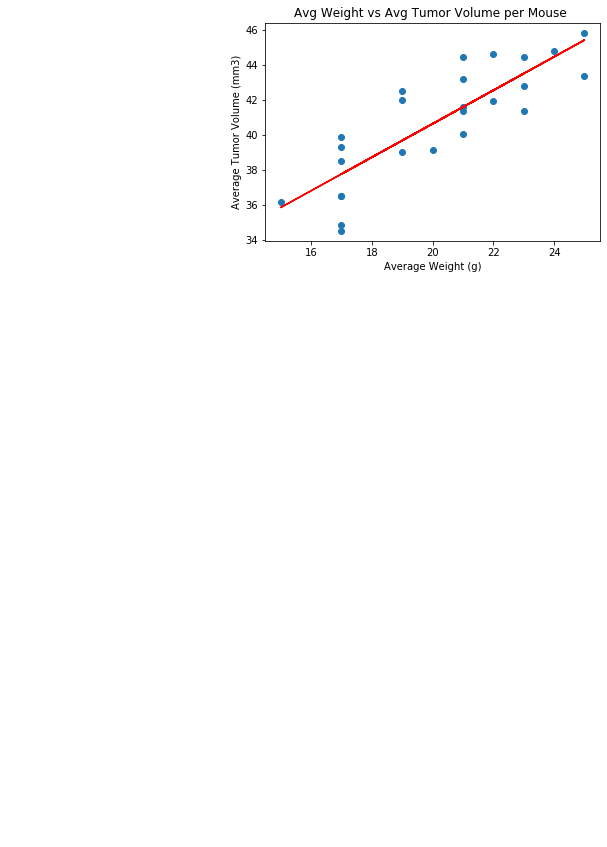

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate the correlation coefficient 
correlation = st.pearsonr(avg_weight,avg_tumor_size)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculate linear regression and plot the line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_weight, avg_tumor_size)
regress_values = avg_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_weight, avg_tumor_size)
plt.plot(avg_weight,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="red")

plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Avg Weight vs Avg Tumor Volume per Mouse ")
